# Analysis on the Energy Use of India when compared to Other Developing countries

I am investigating India's energy use given the World Development Indicators dataset provided by the World bank. I am particularly interested to know how India has been performing over time, as well as how it performs compared to other developing coutries in South-East Asia. The further report provides the code in python as well as the figures obtained from the analysis and the inferences from the figures.

In [1]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pylab import fill_between
from IPython.display import Image
from sklearn.cluster import KMeans
#Read Datasets
country = pd.read_csv('./input/Country.csv')
country_notes = pd.read_csv('./input/CountryNotes.csv')
indicators = pd.read_csv('./input/Indicators.csv')
#Stylistic Options
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
    


/Users/sandeepkatypally/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


##Table of Contents
---
1. What percentage of the population has access to electricty?
    -  Access to electricity over time   
    -  Comparison to other South-East Asian (SEA) countries
2. What constitutes India's energy mix?
    - Energy Mix in the India 
    - Comparison to South-East Asian (SEA) countries
        - Fossil-Fuel use
        - Renewable Energy Adoption
3. How is India consuming its energy? 
    - Electric Power Consumption over time 
    - Consumption footprint

##1. What percentage of the population has access to electricity?
The charts below show the percentage of the urban and rural population with access to electricity and the comparison of the country's performance with its neighboring south-east Asian nations.

###1.1 Access to electricity over time
The percentage of populations( rural, urban and overall) who have access to electricity for years ranging from 1990 to 2014 have been taken to plot the time series graph.

In [2]:
countries_attributes={}
countries_list=['Russian Federation','Sri Lanka','India','Myanmar','Pakistan','China', 'Japan','Singapore','Thailand','Vietnam','Philippines','Korea, Rep.','Malaysia']
attributes={'gdp_per_person':'NY.GDP.PCAP.CD','percent_electricity_access':'EG.ELC.ACCS.ZS','electric_power_consumption':'EG.USE.ELEC.KH.PC','life_expectancy':'SP.DYN.LE00.IN'}

for cntry in countries_list:
    countries_attributes[cntry]=[]

for cntry in countries_list:
    for attr in attributes.values():
        df_elec_pop = indicators[(indicators.CountryName==cntry)&(indicators.IndicatorCode==attr)&(indicators.Year==2012)]
        #print(list(df_elec_pop.Value)[0])
        #print(list(df_elec_pop.Value))
        countries_attributes[cntry].append(float(list(df_elec_pop.Value)[0]))
print(countries_attributes)
        #df_gdp_pop=indicators[(indicators.CountryName==cntry)&(indicators.IndicatorCode=='')

{'Pakistan': [93.6, 65.7168780487805, 1266.38075811451, 451.699547734475], 'Myanmar': [52.362559999999995, 65.4277804878049, 1421.49735080062, 152.653476551134], 'Singapore': [100.0, 81.9951219512195, 54577.1373654638, 8689.66945260146], 'Korea, Rep.': [100.0, 81.2134146341464, 24453.9719124644, 10345.60110371], 'Philippines': [87.5, 68.0070731707317, 2604.6559968370198, 672.389092459796], 'Malaysia': [100.0, 74.4233170731707, 10834.6590783671, 4345.4710470768], 'India': [78.7, 67.2898780487805, 1449.66487452505, 743.741457664801], 'Sri Lanka': [88.66256, 74.0680487804878, 3366.5103597872608, 526.81031090122], 'Vietnam': [99.0, 75.6066829268293, 1755.26542357512, 1272.5392546599198], 'China': [100.0, 75.199512195122, 6264.64387793993, 3475.00879177016], 'Thailand': [100.0, 74.07190243902441, 5917.9179338712, 2464.67869084287], 'Russian Federation': [100.0, 70.36585365853661, 14078.8305693118, 6617.13624077975], 'Japan': [100.0, 83.0960975609756, 46679.26543223031, 7752.488684104341]}


In [3]:
count=0
X=[]
Y=[]
for key in countries_attributes:
    if count==0:
        X=np.array(countries_attributes[key],dtype=float)
        X=np.reshape(X,(1,len(countries_attributes[key])))
        #print(X)
        print(np.shape(X))
        Y=np.array(key,dtype=str)        
        count+=1
    else:
        row_to_append=np.reshape(np.array(countries_attributes[key],dtype=float),(1,len(countries_attributes[key])))
        print(row_to_append)
        print(np.shape(row_to_append))
        X=np.append(X,row_to_append,axis=0)
        Y=np.append(Y,np.array(key,dtype=str))
#print(X)
np.shape(X)
#print(Y)

    

(1, 4)
[[   52.36256       65.42778049  1421.4973508    152.65347655]]
(1, 4)
[[   100.             81.99512195  54577.13736546   8689.6694526 ]]
(1, 4)
[[   100.             81.21341463  24453.97191246  10345.60110371]]
(1, 4)
[[   87.5           68.00707317  2604.65599684   672.38909246]]
(1, 4)
[[   100.             74.42331707  10834.65907837   4345.47104708]]
(1, 4)
[[   78.7           67.28987805  1449.66487453   743.74145766]]
(1, 4)
[[   88.66256       74.06804878  3366.51035979   526.8103109 ]]
(1, 4)
[[   99.            75.60668293  1755.26542358  1272.53925466]]
(1, 4)
[[  100.            75.1995122   6264.64387794  3475.00879177]]
(1, 4)
[[  100.            74.07190244  5917.91793387  2464.67869084]]
(1, 4)
[[   100.             70.36585366  14078.83056931   6617.13624078]]
(1, 4)
[[   100.             83.09609756  46679.26543223   7752.4886841 ]]
(1, 4)


(13, 4)

In [4]:
#applying k means clustering
clf=KMeans(n_clusters=2)
clf.fit(X,Y)
clf.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [5]:
#fig = plt.figure()
#plt.plot(df_elec_rural.Year,df_elec_rural.Value,'o-',label='Rural',color=tableau20[0])
#plt.plot(df_elec_urban.Year,df_elec_urban.Value,'o-',label='Urban',color=tableau20[2])
#plt.plot(df_elec_pop.Year,df_elec_pop.Value,'o-',label='General',color=tableau20[1])
#lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xlabel('Years',  fontsize=10)
#plt.ylabel('% of Population',  fontsize=10)
#plt.title('Access to Electricity', fontsize=10)
#fig.savefig('access_electricity.png',format='png', dpi=300,bbox_extra_artists=(lgd,),bbox_inches='tight')
#Image(filename='./access_electricity.png')

The chart above shows the population's access to electricity over a period of 24 years. It looks like the percent of population who have access to electricity has decreased for the urban population. Also, the plot is steeper for the rural population from 2000 to 2010. Overall access to electricity has been increasing in the country and it seems it will increase further in future. 

###1.2 Comparison to South-East Asian (SEA) countries
Now we compare access of electricity for populations of India to that of other SEA countries over the years since 1990. 

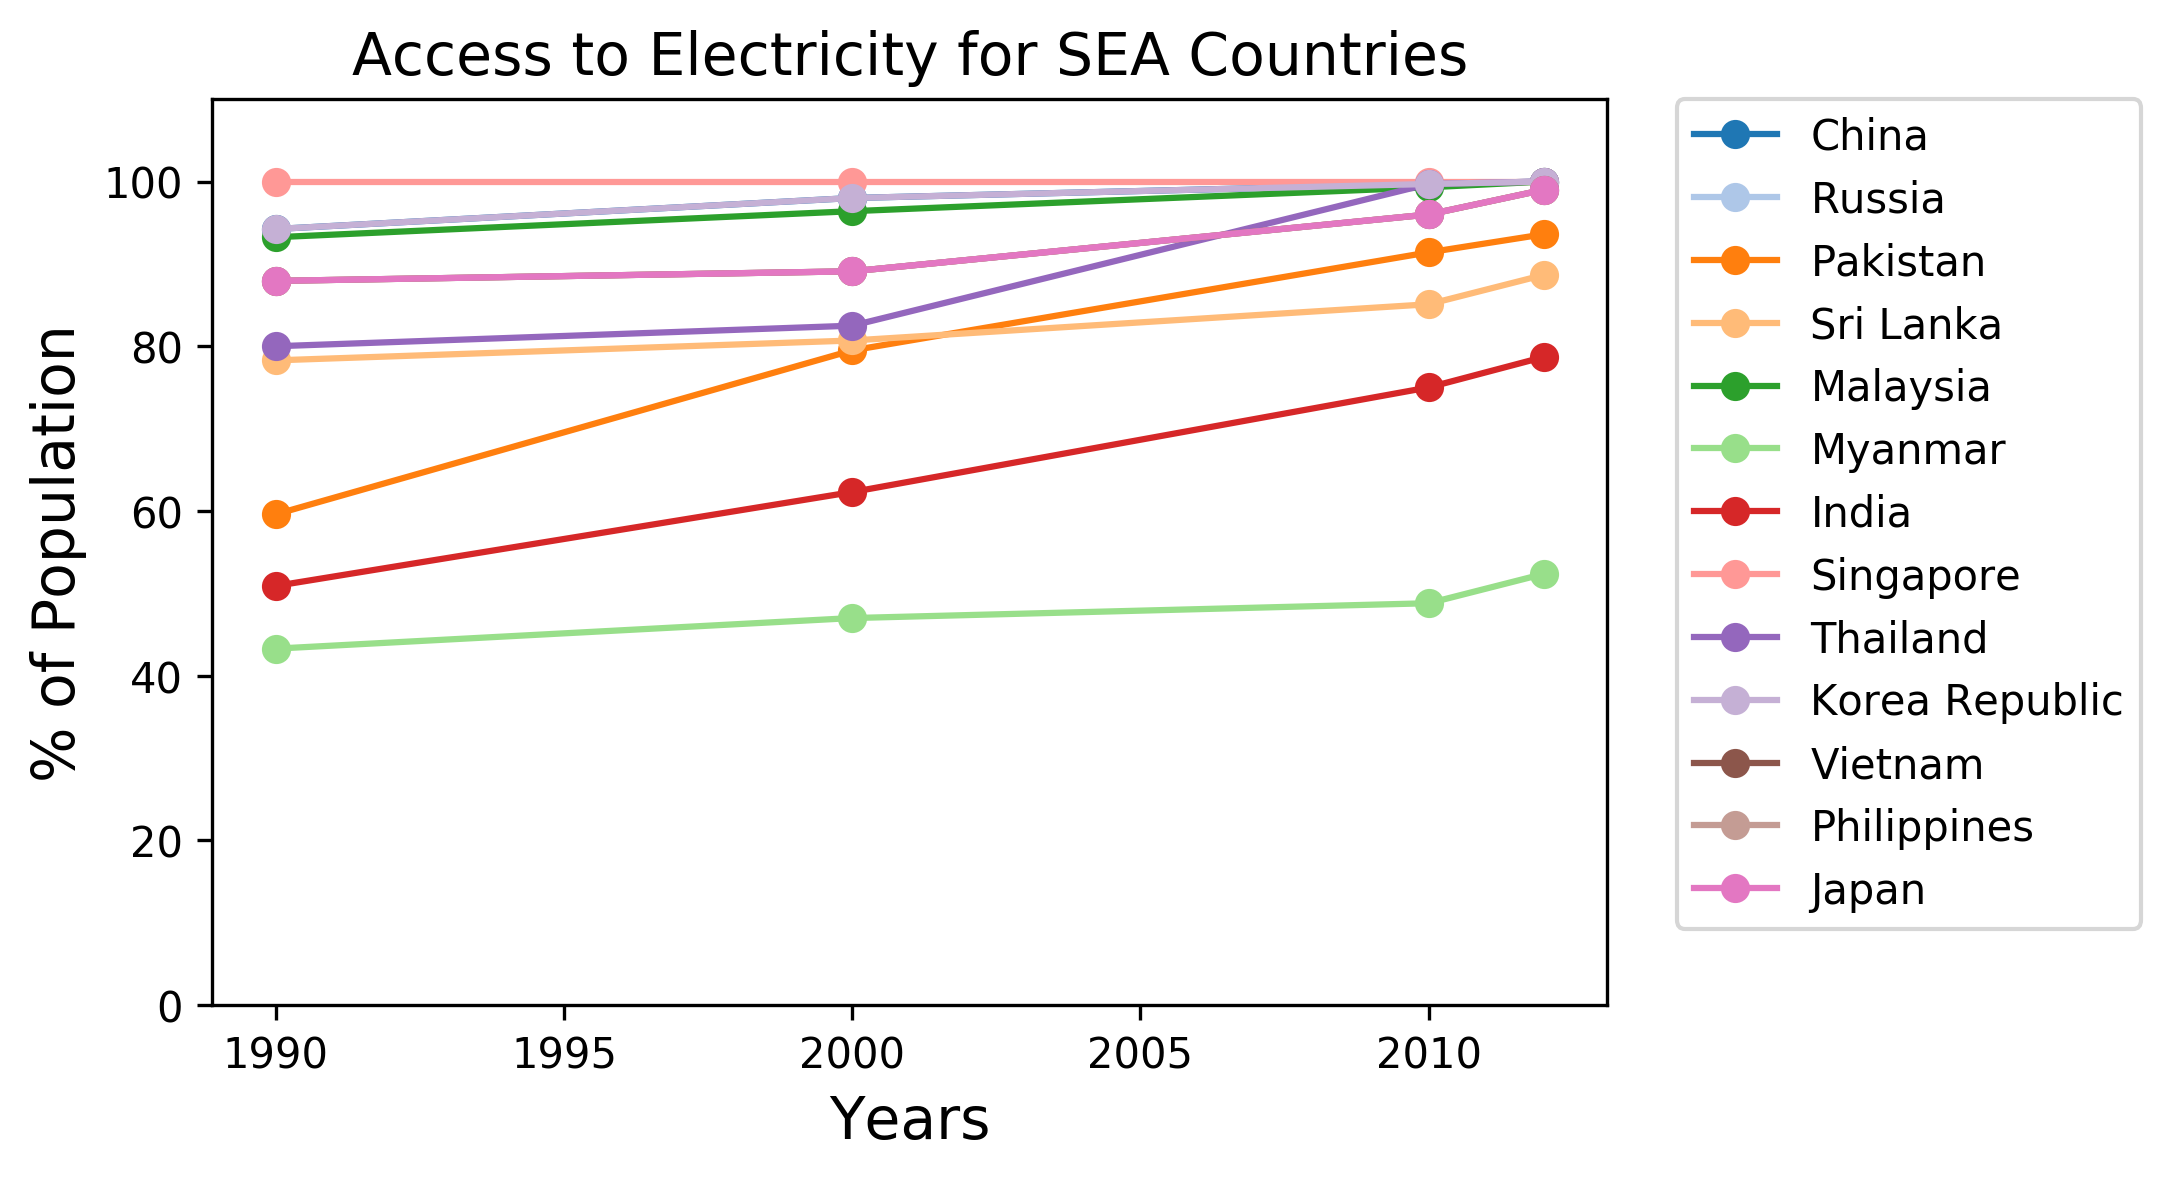

In [6]:
df_ca_elec_pop = indicators[(indicators.CountryName=='China')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_rs_elec_pop = indicators[(indicators.CountryName=='Russia')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_pk_elec_pop = indicators[(indicators.CountryName=='Pakistan')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_sl_elec_pop = indicators[(indicators.CountryName=='Sri Lanka')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_ma_elec_pop = indicators[(indicators.CountryName=='Malaysia')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_my_elec_pop = indicators[(indicators.CountryName=='Myanmar')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_in_elec_pop = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_si_elec_pop = indicators[(indicators.CountryName=='Singapore')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_th_elec_pop = indicators[(indicators.CountryName=='Thailand')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_ti_elec_pop = indicators[(indicators.CountryName=='Korea, Rep.')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_vi_elec_pop = indicators[(indicators.CountryName=='Vietnam')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_pi_elec_pop = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]
df_ja_elec_pop = indicators[(indicators.CountryName=='Japan')&(indicators.IndicatorCode=='EG.ELC.ACCS.ZS')]

fig = plt.figure()

plt.plot(df_ca_elec_pop.Year,df_ca_elec_pop.Value,'o-',label='China',color=tableau20[0])
plt.plot(df_rs_elec_pop.Year,df_rs_elec_pop.Value,'o-',label='Russia',color=tableau20[1])
plt.plot(df_pk_elec_pop.Year,df_pk_elec_pop.Value,'o-',label='Pakistan',color=tableau20[2])
plt.plot(df_sl_elec_pop.Year,df_sl_elec_pop.Value,'o-',label='Sri Lanka',color=tableau20[3])
plt.plot(df_ma_elec_pop.Year,df_ma_elec_pop.Value,'o-',label='Malaysia',color=tableau20[4])
plt.plot(df_my_elec_pop.Year,df_my_elec_pop.Value,'o-',label='Myanmar',color=tableau20[5])
plt.plot(df_in_elec_pop.Year,df_in_elec_pop.Value,'o-',label='India',color=tableau20[6])
plt.plot(df_si_elec_pop.Year,df_si_elec_pop.Value,'o-',label='Singapore',color=tableau20[7])
plt.plot(df_th_elec_pop.Year,df_th_elec_pop.Value,'o-',label='Thailand',color=tableau20[8])
plt.plot(df_ti_elec_pop.Year,df_ti_elec_pop.Value,'o-',label='Korea Republic',color=tableau20[9])
plt.plot(df_vi_elec_pop.Year,df_vi_elec_pop.Value,'o-',label='Vietnam',color=tableau20[10])
plt.plot(df_pi_elec_pop.Year,df_vi_elec_pop.Value,'o-',label='Philippines',color=tableau20[11])
plt.plot(df_ja_elec_pop.Year,df_vi_elec_pop.Value,'o-',label='Japan',color=tableau20[12])

lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Population',  fontsize=14)
plt.title('Access to Electricity for SEA Countries', fontsize=14)
plt.ylim([0,110])
fig.savefig('access_electricity_sea.png',format='png', dpi=300,bbox_extra_artists=(lgd,),bbox_inches='tight')
Image(filename='./access_electricity_sea.png')

Top-performing countries in achieving the goal of universal access to electricity are
Singapore, China, Malaysia, Vietnam and Thailand. Achieving almost a 100% by the turn of 2012. Singapore, 
on the other hand, is a consistent performer, allowing 100 percent of its population to have access to 
electricity for 20 years.

##2. What constitutes India's energy mix?

Equally important in understanding the country's energy use is to know where the energy is being 
sourced from. This section will look into the different sources of energy&mdash;fossil fuels (coal, 
natural gas, petroleum), hydroelectric, and renewable in order to gain insight to where most of the
electricity is coming from. 

Moreover, a comparison with the SEA top-performers (in terms of providing electricity access) 
will be done in order to assess where the huge bulk of the electricity that they are 
sourcing effectively to the population is coming from. 

Lastly, it is also important to investigate the country's adoption to renewable energy, 
and compare this with its SEA neighbors. This can help identify trends, especially that using 
fossil fuels contributes much to the carbon footprint&mdash;given the devastating results of 
global warming and climate change.

###2.1 Energy Mix in the India





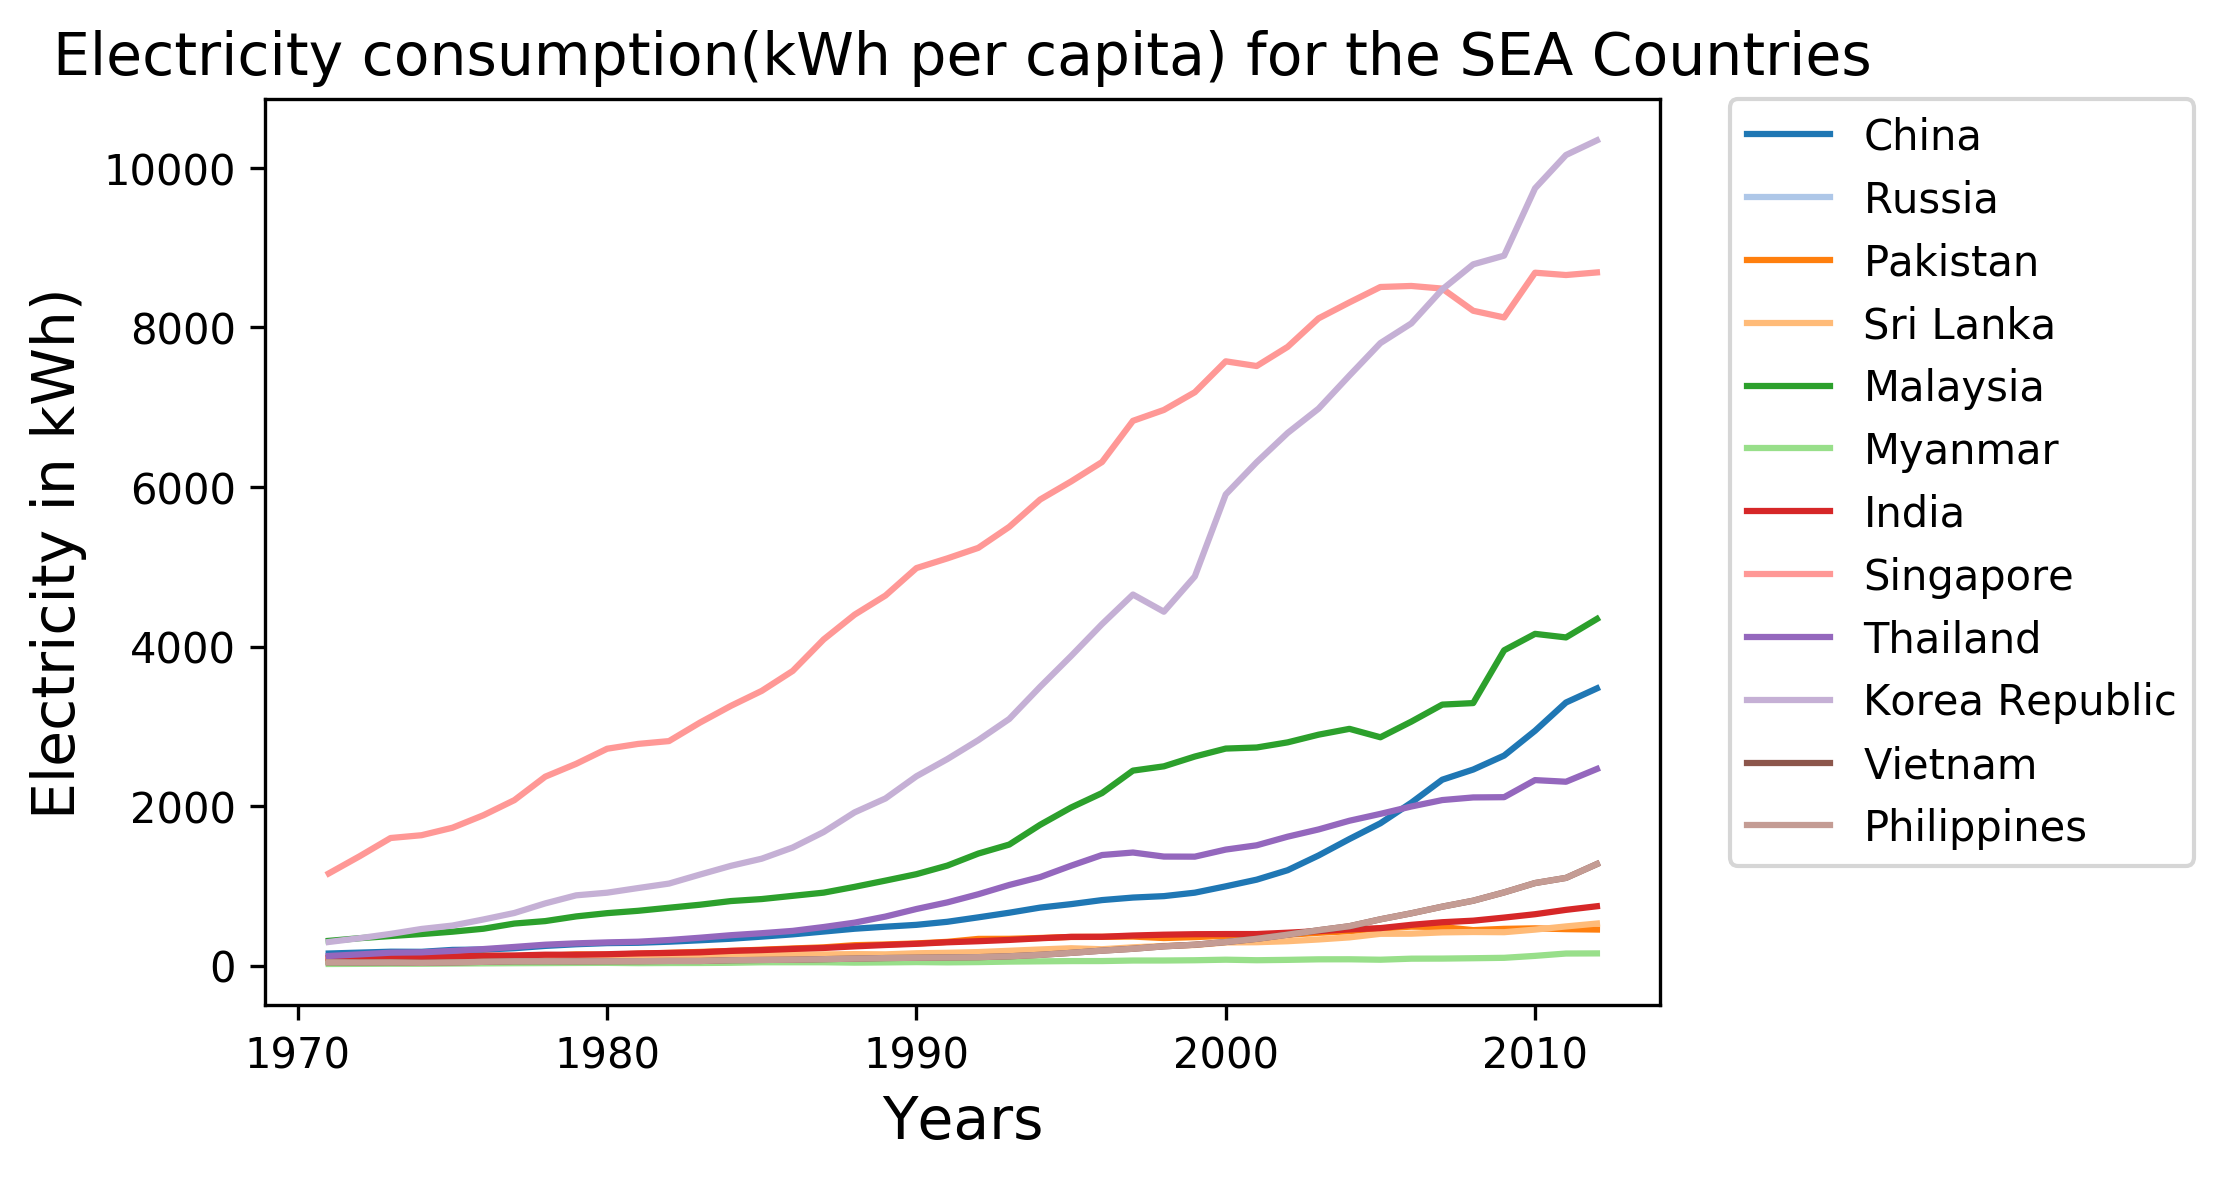

In [7]:
#this is for electricity consumption
df_ca_elec_pop = indicators[(indicators.CountryName=='China')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]
df_rs_elec_pop = indicators[(indicators.CountryName=='Russia')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]
df_pk_elec_pop = indicators[(indicators.CountryName=='Pakistan')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]
df_sl_elec_pop = indicators[(indicators.CountryName=='Sri Lanka')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]
df_ma_elec_pop = indicators[(indicators.CountryName=='Malaysia')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]
df_my_elec_pop = indicators[(indicators.CountryName=='Myanmar')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]
df_in_elec_pop = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]
df_si_elec_pop = indicators[(indicators.CountryName=='Singapore')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]
df_th_elec_pop = indicators[(indicators.CountryName=='Thailand')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]
df_ti_elec_pop = indicators[(indicators.CountryName=='Korea, Rep.')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]
df_vi_elec_pop = indicators[(indicators.CountryName=='Vietnam')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]
df_pi_elec_pop = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]
df_ja_elec_pop = indicators[(indicators.CountryName=='Japan')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]

fig = plt.figure()

plt.plot(df_ca_elec_pop.Year,df_ca_elec_pop.Value,'-',label='China',color=tableau20[0])
plt.plot(df_rs_elec_pop.Year,df_rs_elec_pop.Value,'-',label='Russia',color=tableau20[1])
plt.plot(df_pk_elec_pop.Year,df_pk_elec_pop.Value,'-',label='Pakistan',color=tableau20[2])
plt.plot(df_sl_elec_pop.Year,df_sl_elec_pop.Value,'-',label='Sri Lanka',color=tableau20[3])
plt.plot(df_ma_elec_pop.Year,df_ma_elec_pop.Value,'-',label='Malaysia',color=tableau20[4])
plt.plot(df_my_elec_pop.Year,df_my_elec_pop.Value,'-',label='Myanmar',color=tableau20[5])
plt.plot(df_in_elec_pop.Year,df_in_elec_pop.Value,'-',label='India',color=tableau20[6])
plt.plot(df_si_elec_pop.Year,df_si_elec_pop.Value,'-',label='Singapore',color=tableau20[7])
plt.plot(df_th_elec_pop.Year,df_th_elec_pop.Value,'-',label='Thailand',color=tableau20[8])
plt.plot(df_ti_elec_pop.Year,df_ti_elec_pop.Value,'-',label='Korea Republic',color=tableau20[9])
plt.plot(df_vi_elec_pop.Year,df_vi_elec_pop.Value,'-',label='Vietnam',color=tableau20[10])
plt.plot(df_pi_elec_pop.Year,df_vi_elec_pop.Value,'-',label='Philippines',color=tableau20[11])
#plt.plot(df_ja_elec_pop.Year,df_vi_elec_pop.Value,'-',label='Japan',color=tableau20[12])

lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('Electricity in kWh)',  fontsize=14)
plt.title('Electricity consumption(kWh per capita) for the SEA Countries', fontsize=14)
#plt.ylim([0,110])
fig.savefig('elec_consumption.png',format='png', dpi=300,bbox_extra_artists=(lgd,),bbox_inches='tight')
Image(filename='./elec_consumption.png')

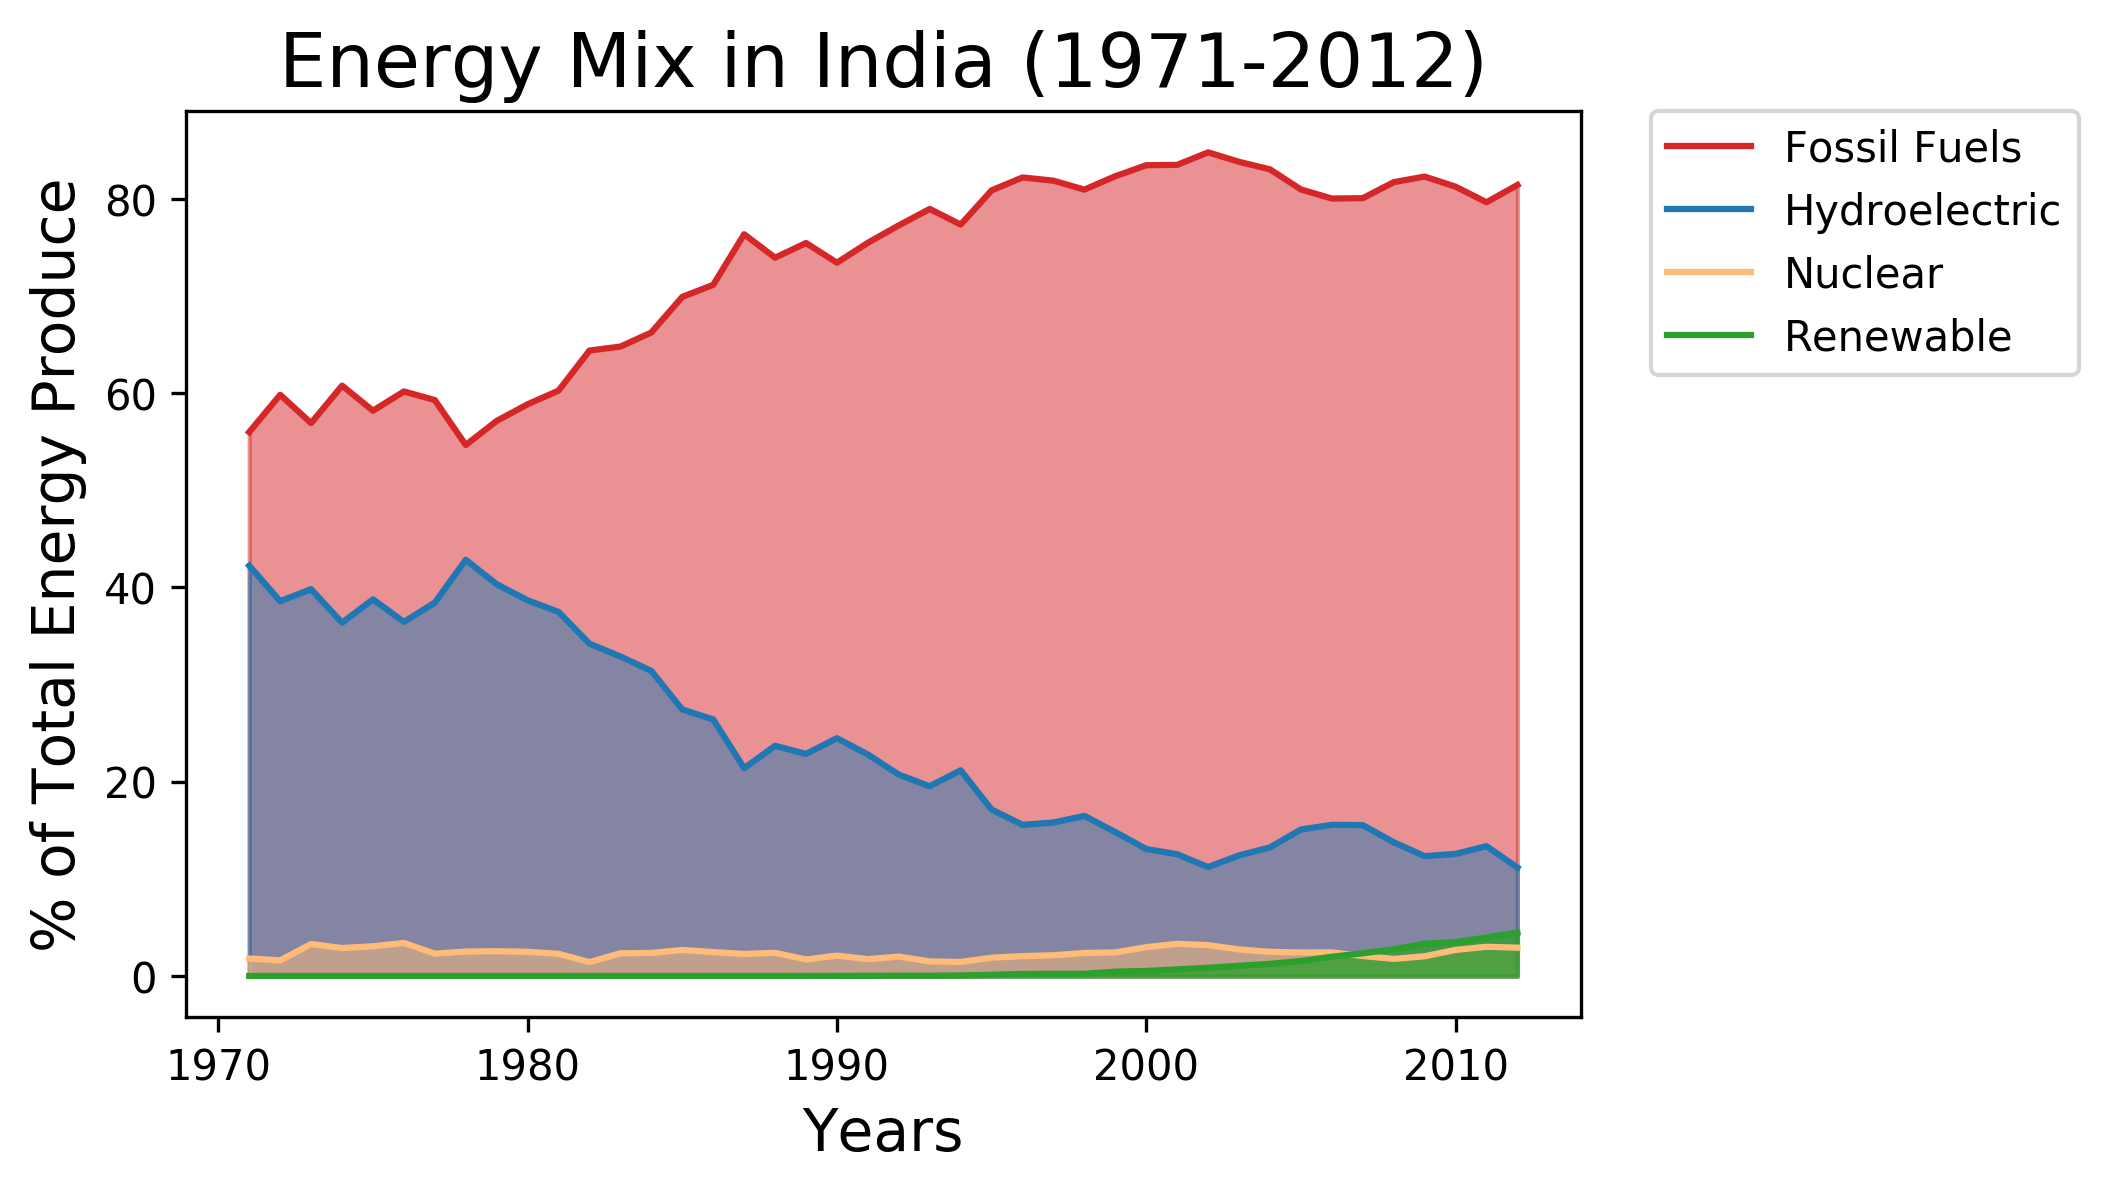

In [8]:
df_elec_fosl = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_elec_hydro = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.HYRO.ZS')]
df_elec_nucl = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.NUCL.ZS')]
df_elec_rnwx = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]

fig = plt.figure()

plt.plot(df_elec_fosl.Year,df_elec_fosl.Value,label='Fossil Fuels',color=tableau20[6])
plt.plot(df_elec_hydro.Year,df_elec_hydro.Value,label='Hydroelectric',color=tableau20[0])
plt.plot(df_elec_nucl.Year,df_elec_nucl.Value,label='Nuclear',color=tableau20[3])
plt.plot(df_elec_rnwx.Year,df_elec_rnwx.Value,label='Renewable',color=tableau20[4])

fill_between(df_elec_fosl.Year,df_elec_fosl.Value,0,alpha=0.5,color=tableau20[6])
fill_between(df_elec_hydro.Year,df_elec_hydro.Value,0,alpha=0.5,color=tableau20[0])
fill_between(df_elec_nucl.Year,df_elec_nucl.Value,0,alpha=0.5,color=tableau20[3])
fill_between(df_elec_rnwx.Year,df_elec_rnwx.Value,0,alpha=0.5,color=tableau20[4])
fill_between(df_elec_rnwx.Year,df_elec_rnwx.Value,0,alpha=0.5,color=tableau20[4])

lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Total Energy Produce',  fontsize=14)
plt.title('Energy Mix in India (1971-2012)', fontsize=18)

fig.savefig('energy_mix.png',format='png', dpi=300,bbox_extra_artists=(lgd,),bbox_inches='tight')
Image(filename='./energy_mix.png')

It can be seen that percentage of use of fossil fuel to generage electricity is increasing very highly but percentage of electricity generated using hydrelectricity has been falling steeply. India has started generating Renewable energy from around 2000 onwards.

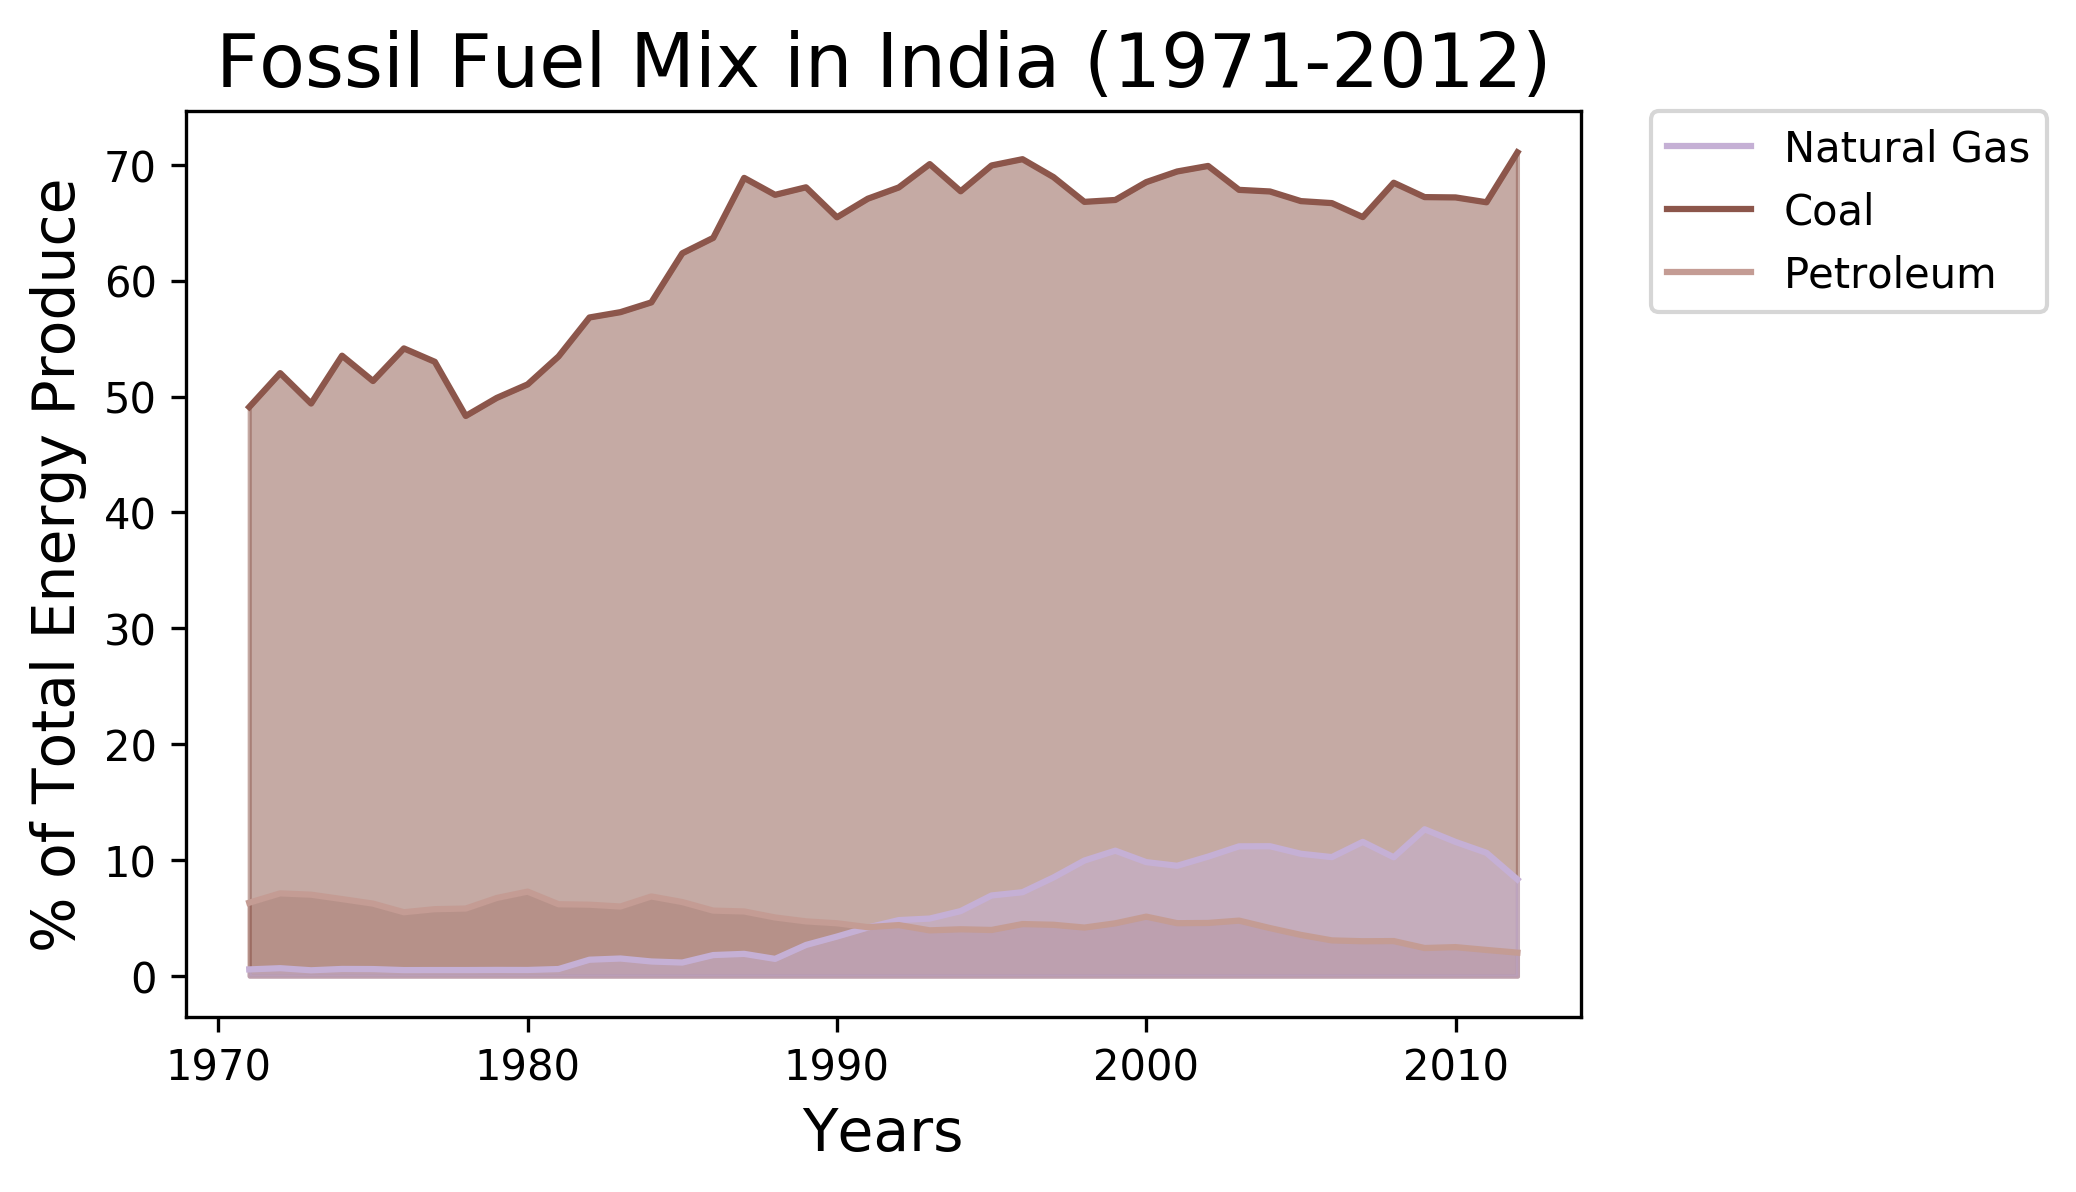

In [9]:
df_elec_ngas = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.NGAS.ZS')]
df_elec_coal = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.COAL.ZS')]
df_elec_petr = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.PETR.ZS')]

fig = plt.figure()

plt.plot(df_elec_ngas.Year,df_elec_ngas.Value,label='Natural Gas',color=tableau20[9])
plt.plot(df_elec_coal.Year,df_elec_coal.Value,label='Coal',color=tableau20[10])
plt.plot(df_elec_petr.Year,df_elec_petr.Value,label='Petroleum',color=tableau20[11])

fill_between(df_elec_petr.Year,df_elec_petr.Value,0,alpha=0.5,color=tableau20[11])
fill_between(df_elec_coal.Year,df_elec_coal.Value,0,alpha=0.5,color=tableau20[10])
fill_between(df_elec_ngas.Year,df_elec_ngas.Value,0,alpha=0.5,color=tableau20[9])

lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Total Energy Produce',  fontsize=14)
plt.title('Fossil Fuel Mix in India (1971-2012)', fontsize=18)
fig.savefig('fossil_fuel_mix.png',format='png', dpi=300,bbox_extra_artists=(lgd,),bbox_inches='tight')
Image(filename='./fossil_fuel_mix.png')

It is evident that the country is still reliant to fossil fuels as a main source of energy. Coal seems like the main source of fossil fuel energy. Amount of electricity produced using natural gas has been increasing since 1990s.

Looking at the country's fossil fuel mix, one can see that the use of petroleum has dropped for the last 20 years. This has been replaced by other fossil fuels such as coal and natural gas. 

###2.2 Comparison to SEA Neighbors
This section looks into the position of India with respect to the
use of fossil fuels and the adoption of renewable energy through time.

####2.2.1 Fossil Fuel Use

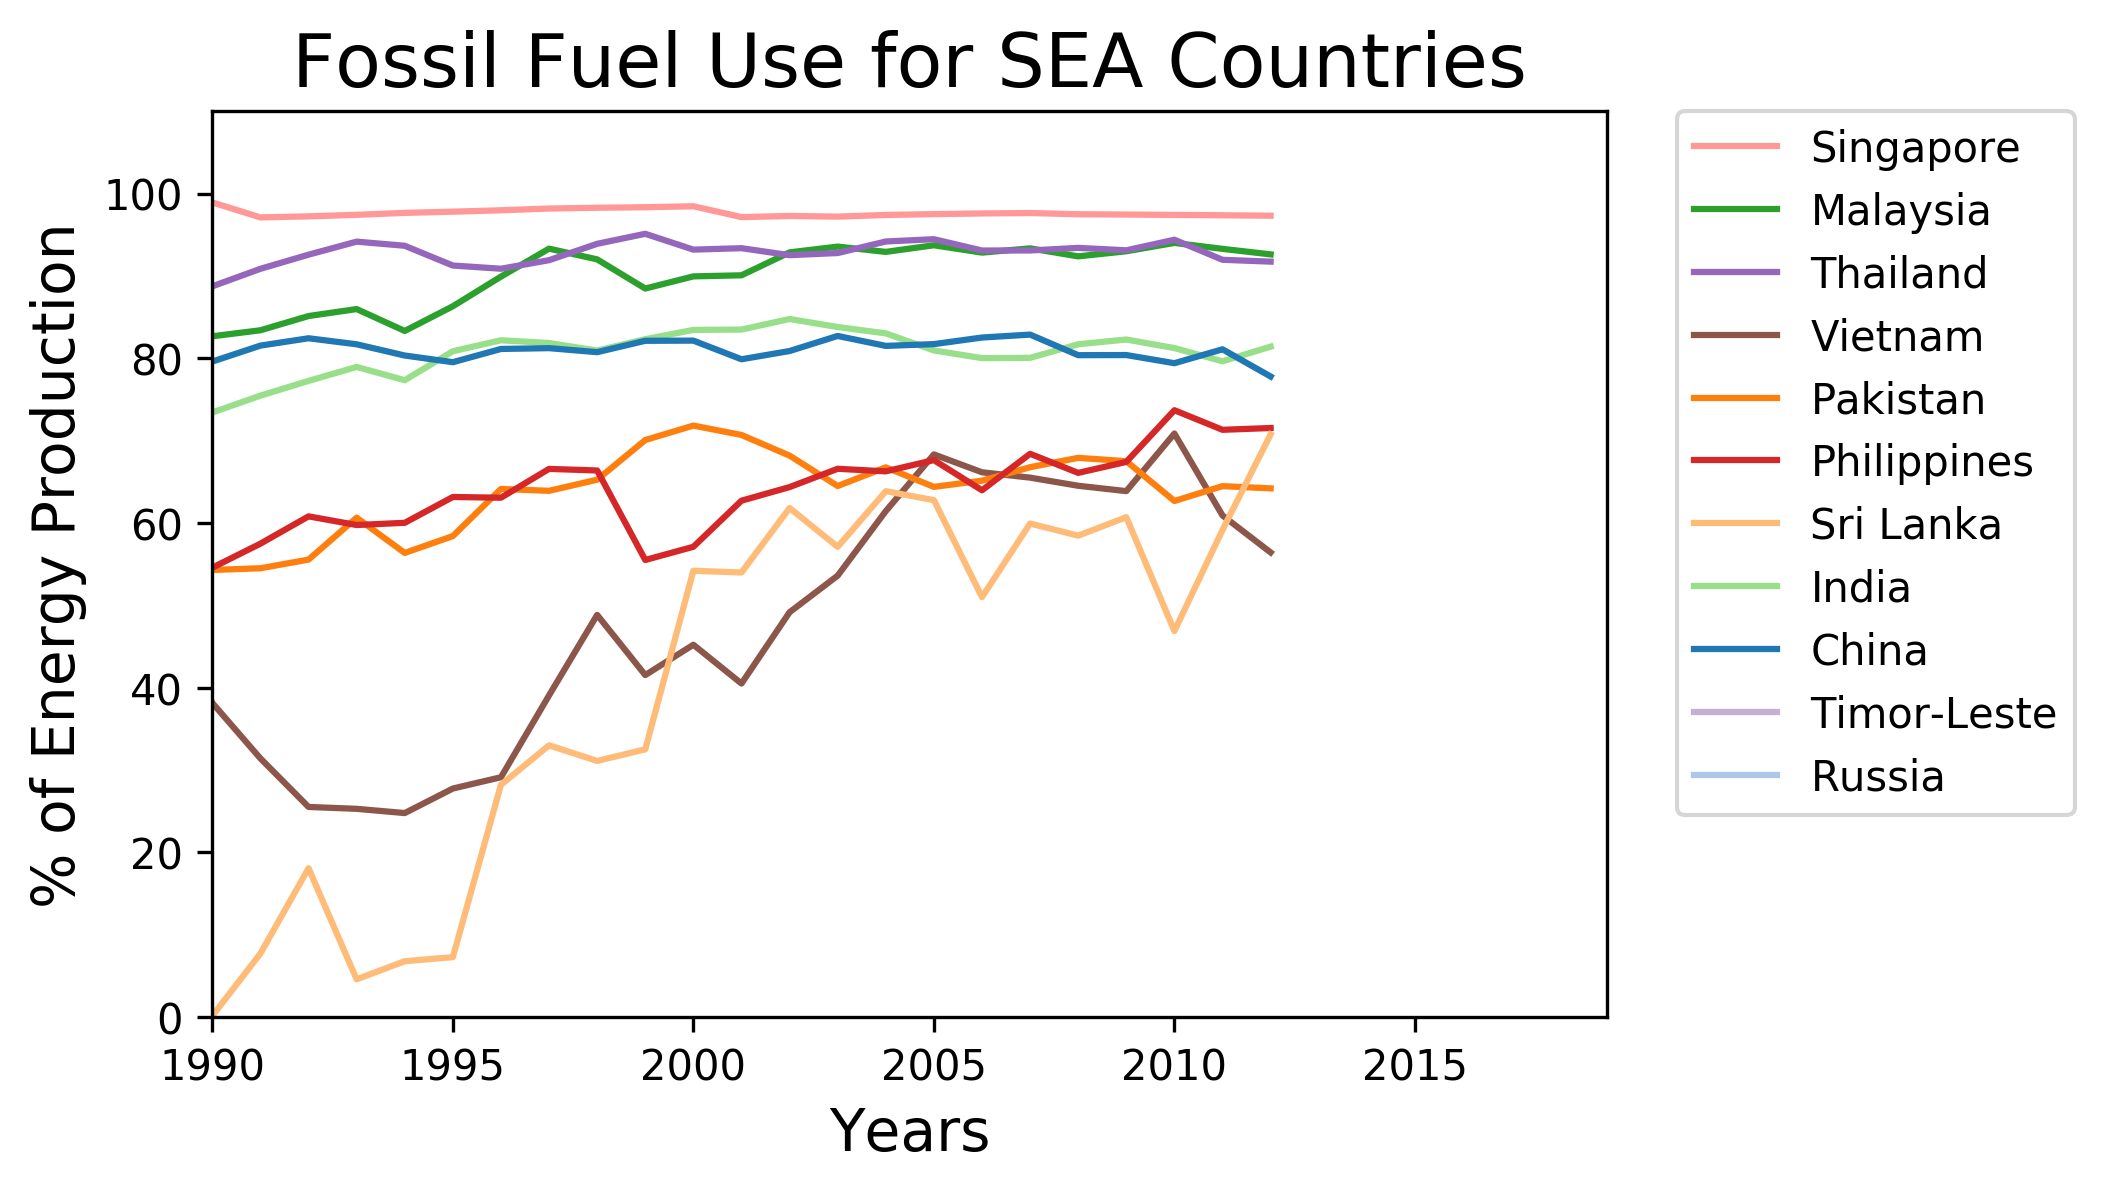

In [10]:
df_ca_elec_pop = indicators[(indicators.CountryName=='China')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_rs_elec_pop = indicators[(indicators.CountryName=='Russia')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_pk_elec_pop = indicators[(indicators.CountryName=='Pakistan')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]

df_sl_elec_pop = indicators[(indicators.CountryName=='Sri Lanka')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_ma_elec_pop = indicators[(indicators.CountryName=='Malaysia')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_in_elec_pop = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]

df_ph_elec_pop = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_si_elec_pop = indicators[(indicators.CountryName=='Singapore')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_th_elec_pop = indicators[(indicators.CountryName=='Thailand')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]

df_ti_elec_pop = indicators[(indicators.CountryName=='Timor-Leste')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]
df_vi_elec_pop = indicators[(indicators.CountryName=='Vietnam')&(indicators.IndicatorCode=='EG.ELC.FOSL.ZS')]

fig = plt.figure()

plt.plot(df_si_elec_pop.Year,df_si_elec_pop.Value,label='Singapore',color=tableau20[7])
plt.plot(df_ma_elec_pop.Year,df_ma_elec_pop.Value,label='Malaysia',color=tableau20[4])
plt.plot(df_th_elec_pop.Year,df_th_elec_pop.Value,label='Thailand',color=tableau20[8])
plt.plot(df_vi_elec_pop.Year,df_vi_elec_pop.Value,label='Vietnam',color=tableau20[10])
plt.plot(df_pk_elec_pop.Year,df_pk_elec_pop.Value,label='Pakistan',color=tableau20[2])
plt.plot(df_ph_elec_pop.Year,df_ph_elec_pop.Value,label='Philippines',color=tableau20[6])
plt.plot(df_sl_elec_pop.Year,df_sl_elec_pop.Value,label='Sri Lanka',color=tableau20[3])
plt.plot(df_in_elec_pop.Year,df_in_elec_pop.Value,label='India',color=tableau20[5])
plt.plot(df_ca_elec_pop.Year,df_ca_elec_pop.Value,label='China',color=tableau20[0])
plt.plot(df_ti_elec_pop.Year,df_ti_elec_pop.Value,label='Timor-Leste',color=tableau20[9])
plt.plot(df_rs_elec_pop.Year,df_rs_elec_pop.Value,label='Russia',color=tableau20[1])

lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Energy Production',  fontsize=14)
plt.title('Fossil Fuel Use for SEA Countries', fontsize=18)

plt.ylim([0,110])
plt.xlim([1990,2019])
fig.savefig('fossil_fuel_electricity_sea.png',format='png', dpi=300,bbox_extra_artists=(lgd,),bbox_inches='tight')
Image(filename='./fossil_fuel_electricity_sea.png')

The use of fossil fuel in the energy mix is shown in the figure above. It is interesting
that the top-players in providing access to electricity in their respective
population&mdash;Singapore, Thailand, and Malaysia&mdash;are sourcing their energy
mostly from fossil fuels.

####2.2.2 Renewable Energy Adoption

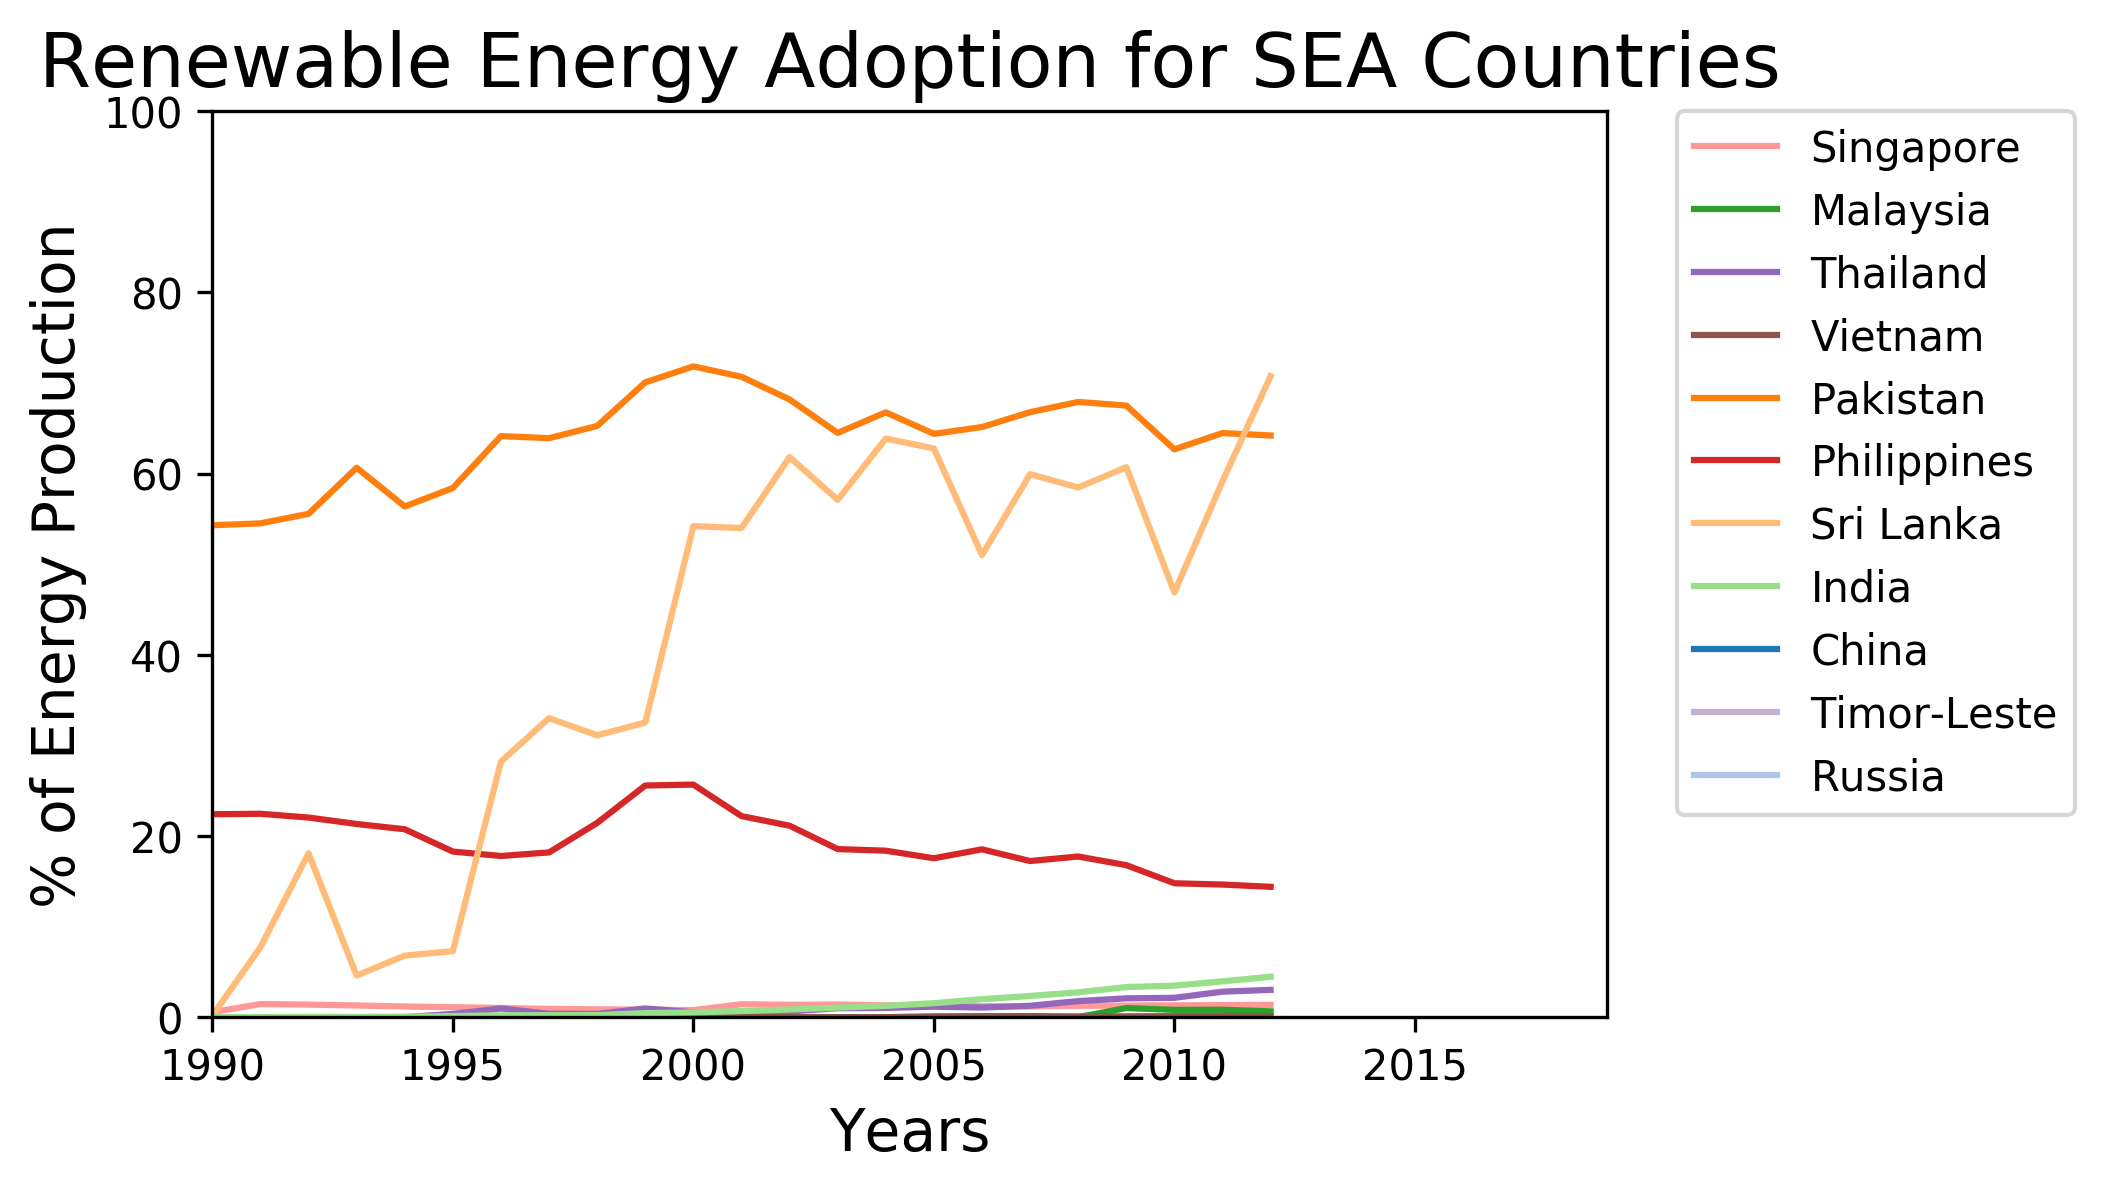

In [11]:
df_br_elec_pop = indicators[(indicators.CountryName=='China')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_ca_elec_pop = indicators[(indicators.CountryName=='Russia')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_in_elec_pop = indicators[(indicators.CountryName=='Pakistan')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]

df_la_elec_pop = indicators[(indicators.CountryName=='Sri Lanka')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_ma_elec_pop = indicators[(indicators.CountryName=='Malaysia')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_in_elec_pop = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]

df_ph_elec_pop = indicators[(indicators.CountryName=='Philippines')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_si_elec_pop = indicators[(indicators.CountryName=='Singapore')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_th_elec_pop = indicators[(indicators.CountryName=='Thailand')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]

df_ti_elec_pop = indicators[(indicators.CountryName=='Timor-Leste')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]
df_vi_elec_pop = indicators[(indicators.CountryName=='Vietnam')&(indicators.IndicatorCode=='EG.ELC.RNWX.ZS')]

fig = plt.figure()

plt.plot(df_si_elec_pop.Year,df_si_elec_pop.Value,label='Singapore',color=tableau20[7])
plt.plot(df_ma_elec_pop.Year,df_ma_elec_pop.Value,label='Malaysia',color=tableau20[4])
plt.plot(df_th_elec_pop.Year,df_th_elec_pop.Value,label='Thailand',color=tableau20[8])
plt.plot(df_vi_elec_pop.Year,df_vi_elec_pop.Value,label='Vietnam',color=tableau20[10])
plt.plot(df_pk_elec_pop.Year,df_pk_elec_pop.Value,label='Pakistan',color=tableau20[2])
plt.plot(df_ph_elec_pop.Year,df_ph_elec_pop.Value,label='Philippines',color=tableau20[6])
plt.plot(df_sl_elec_pop.Year,df_sl_elec_pop.Value,label='Sri Lanka',color=tableau20[3])
plt.plot(df_in_elec_pop.Year,df_in_elec_pop.Value,label='India',color=tableau20[5])
plt.plot(df_ca_elec_pop.Year,df_ca_elec_pop.Value,label='China',color=tableau20[0])
plt.plot(df_ti_elec_pop.Year,df_ti_elec_pop.Value,label='Timor-Leste',color=tableau20[9])
plt.plot(df_rs_elec_pop.Year,df_rs_elec_pop.Value,label='Russia',color=tableau20[1])

lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('% of Energy Production',  fontsize=14)
plt.title('Renewable Energy Adoption for SEA Countries', fontsize=18)

plt.ylim([0,100])
plt.xlim([1990,2019])
fig.savefig('renewable_electricity_sea.png',format='png', dpi=300,bbox_extra_artists=(lgd,),bbox_inches='tight')
Image(filename='./renewable_electricity_sea.png')

The figure above shows the renewable energy adoption of different SEA
countries over time. It is interesting to note that the Pakistan was leading in the percentage of renewable energy adobption until it was beaten by Sri Lanka in around 2011.
The renewable energy race, then followed by Philippines and the rest of the SEA countries including India.

##3. How is India consuming its energy?
With the knowledge of the country's energy sources, the next step is to understand how they consume that energy. This section will first look into the country's electric power consumption over time, then look at the consumption footprint&mdash;particularly that of carbon emissions and other greenhouse gases.

###3.1 Electric power consumption over time

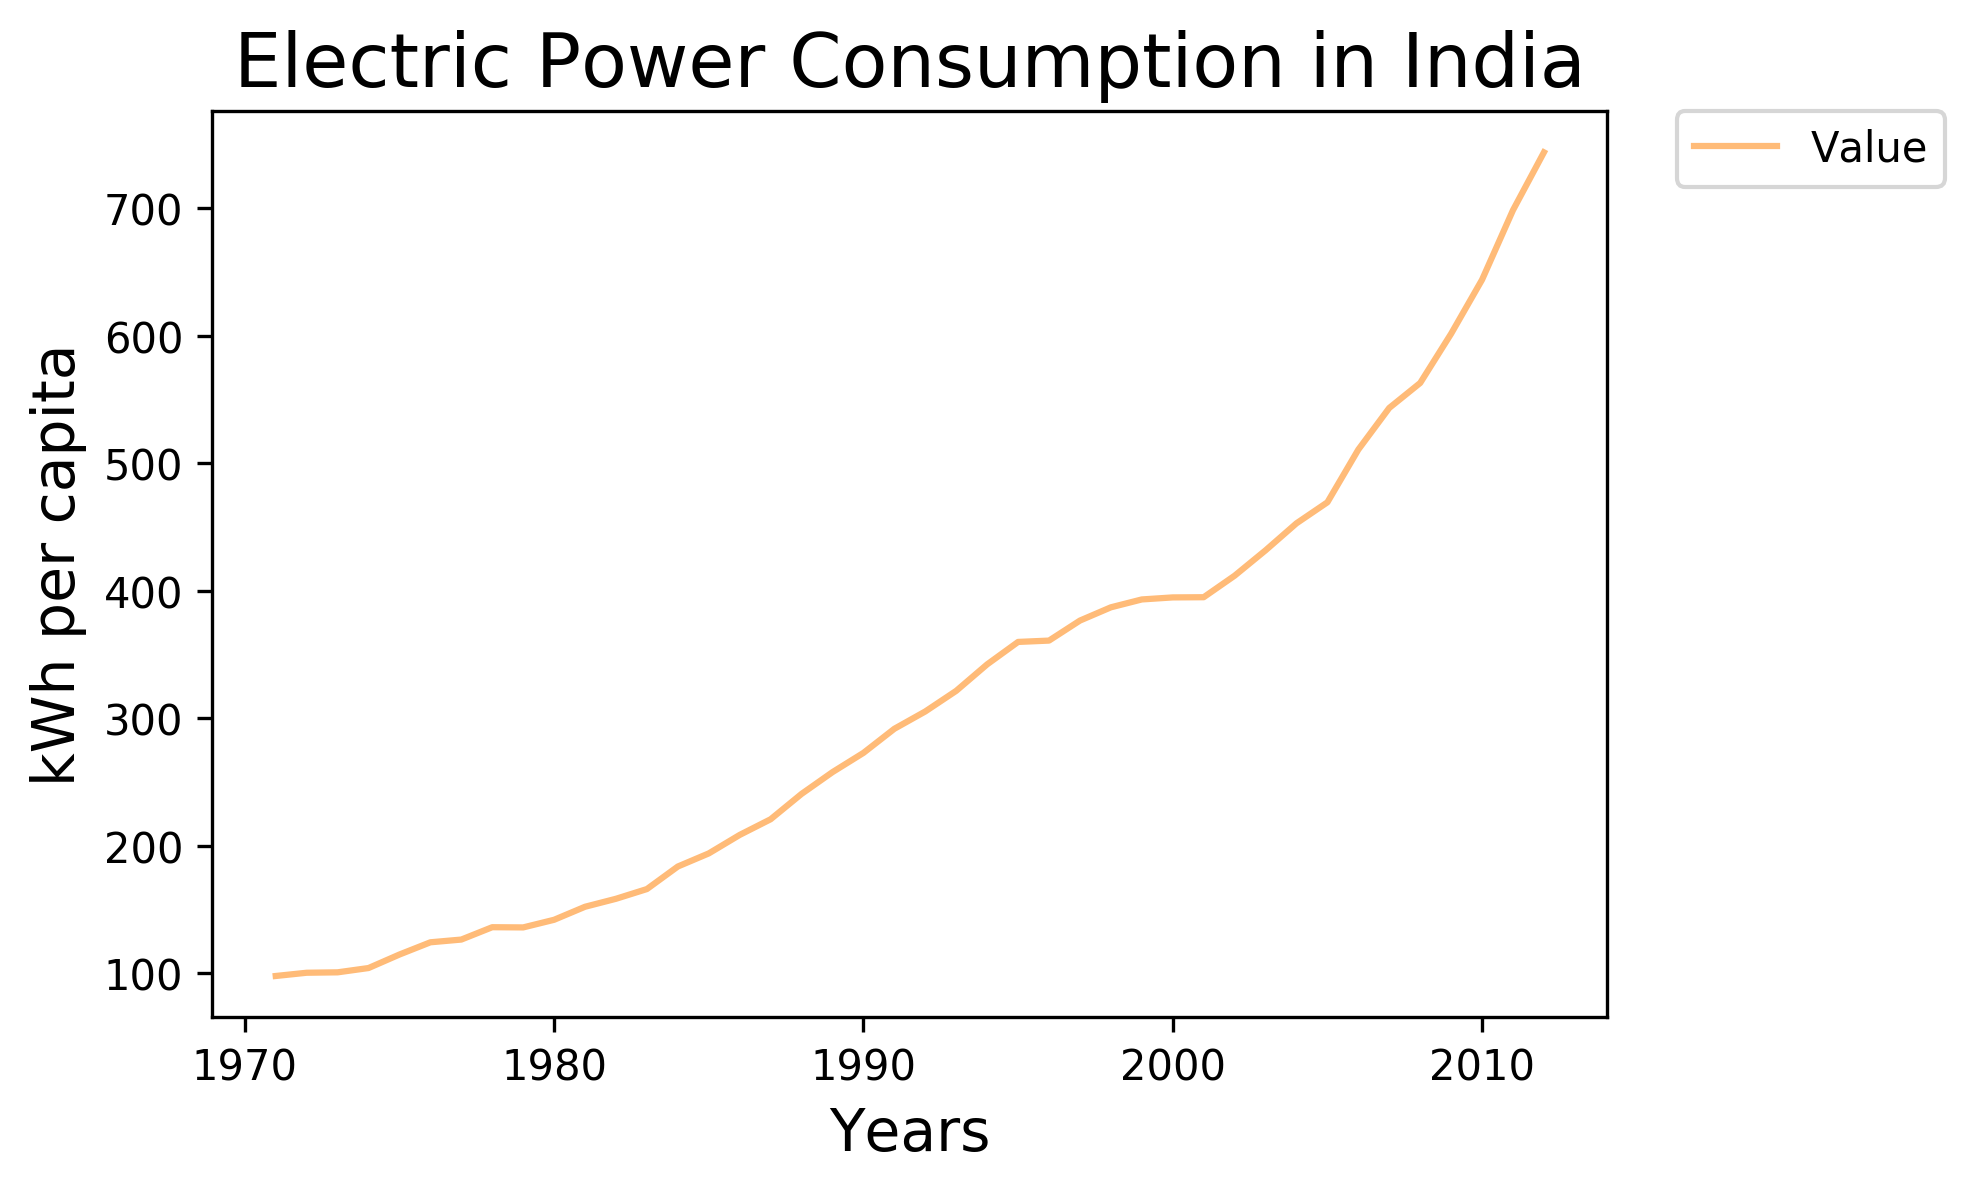

In [12]:
df_elec_use = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EG.USE.ELEC.KH.PC')]
fig = plt.figure()
plt.plot(df_elec_use.Year,df_elec_use.Value,color=tableau20[3])
lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('kWh per capita',  fontsize=14)
plt.title('Electric Power Consumption in India', fontsize=18)

fig.savefig('electric_consumption.png',format='png', dpi=300,bbox_extra_artists=(lgd,),bbox_inches='tight')
Image(filename='./electric_consumption.png')

It can be observed from the chart above that the power consumption
in the country has increased from about 100 kWh to 700 kWh over time.
It is expected that this consumption will increase, and this corresponds to
unprecedented effects in our environment; as they continue utilizing different
sources for their electricity use.

###3.2 Consumption footprint

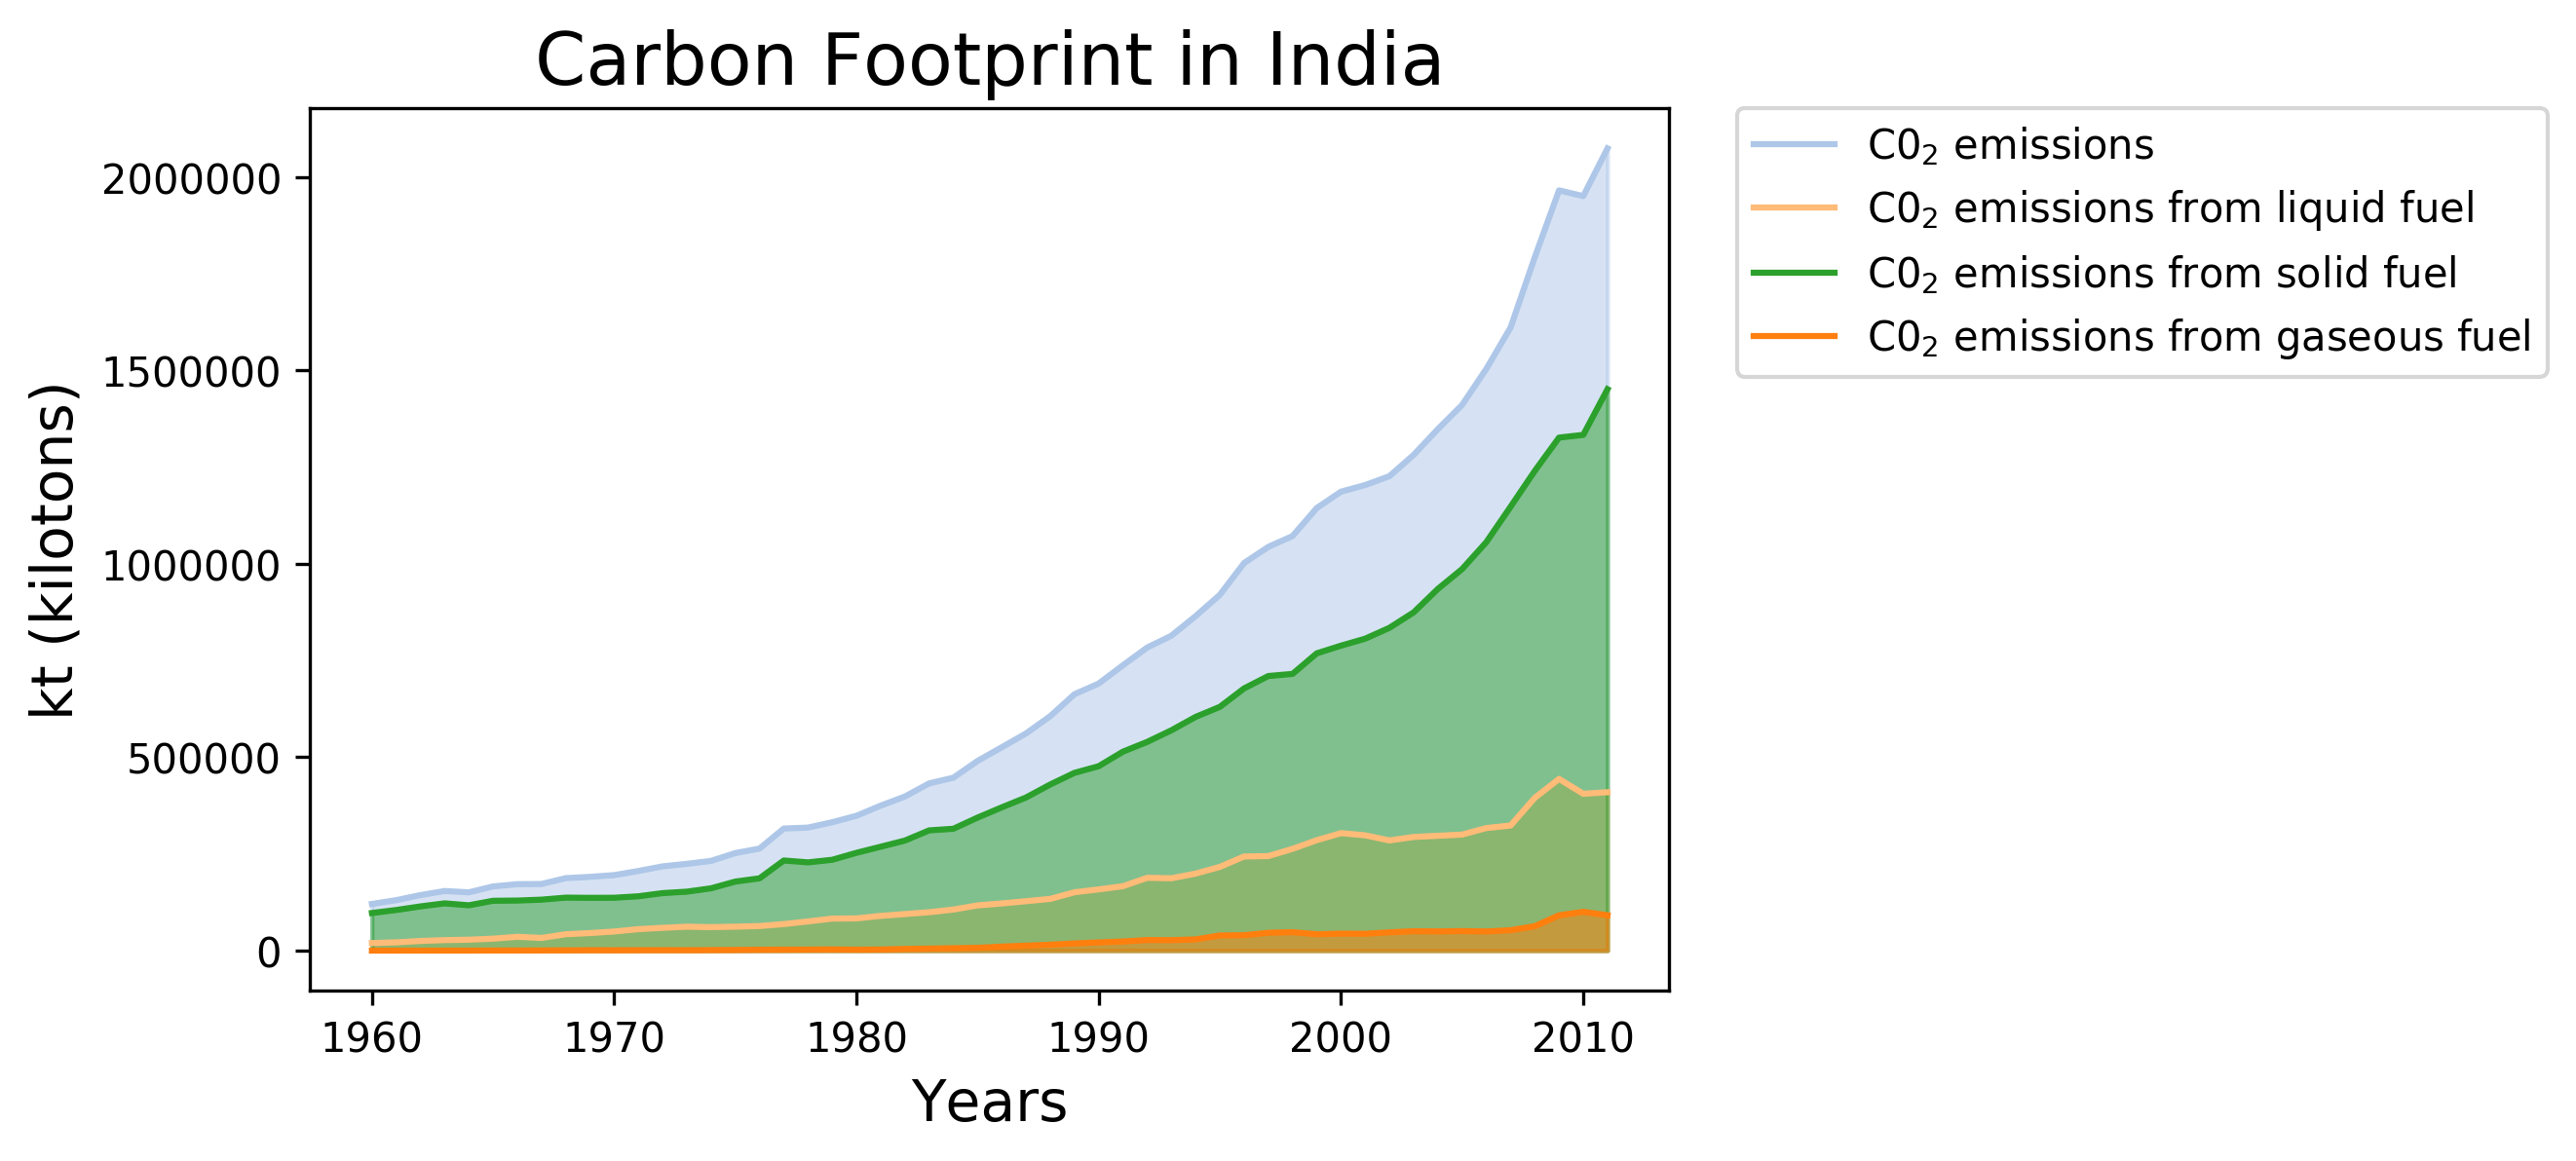

In [13]:
df_elec_emi = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EN.ATM.CO2E.KT')]
df_elec_gf = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EN.ATM.CO2E.GF.KT')]
df_elec_lf = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EN.ATM.CO2E.LF.KT')]
df_elec_sf = indicators[(indicators.CountryName=='India')&(indicators.IndicatorCode=='EN.ATM.CO2E.SF.KT')]

fig = plt.figure()

plt.plot(df_elec_emi.Year,df_elec_emi.Value,label='C0$_2$ emissions',color=tableau20[1])
plt.plot(df_elec_lf.Year,df_elec_lf.Value,label='C0$_2$ emissions from liquid fuel',color=tableau20[3])
plt.plot(df_elec_sf.Year,df_elec_sf.Value,label='C0$_2$ emissions from solid fuel',color=tableau20[4])
plt.plot(df_elec_gf.Year,df_elec_gf.Value,label='C0$_2$ emissions from gaseous fuel',color=tableau20[2])

fill_between(df_elec_emi.Year,df_elec_emi.Value,0,alpha=0.5,color=tableau20[1])
fill_between(df_elec_lf.Year,df_elec_lf.Value,0,alpha=0.5,color=tableau20[3])
fill_between(df_elec_sf.Year,df_elec_sf.Value,0,alpha=0.5,color=tableau20[4])
fill_between(df_elec_gf.Year,df_elec_gf.Value,0,alpha=0.5,color=tableau20[2])

lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.xlabel('Years',  fontsize=14)
plt.ylabel('kt (kilotons)',  fontsize=14)
plt.title('Carbon Footprint in India', fontsize=18)

fig.savefig('co2_emissions.png',format='png', dpi=300,bbox_extra_artists=(lgd,),bbox_inches='tight')
Image(filename='./co2_emissions.png')

This section will look into the carbon footprint and different greenhouse gases, taken mainly
from the use of fossil fuels as energy source, and through the continued consumption of electricity.

Similar to the rise of the electric consumption, the carbon footprint has increased steadily for the last few years. Different sources have contributed to this, the first mainly by solid fuel(coal), then followed by gaseous fuel(Natural gas) and then by liquid fuel(petroleum fuel). It is expected that this trend will continue to rise, and its effects might be felt if left unmitigated.

##Conclusion
This report looks into World Bank's World Development Indicators in order to understand the energy situation in India. Three aspects were considered - the access to electricity of the population, the energy mix, and the energy consumption and footprint.

The country's access to electricity is being resolved through time, increasing the rural population's access for the last twenty years. However, it is apparent that much work needs to be done to decrease the carbon footprint in the country. Lastly, the electricity consumption of the country is still on the rise, and will still be, given the trend for the last twenty years.